In [2]:
from PIL import Image, ImageFilter, ImageEnhance
import cv2, numpy as np
import matplotlib.pyplot as plt

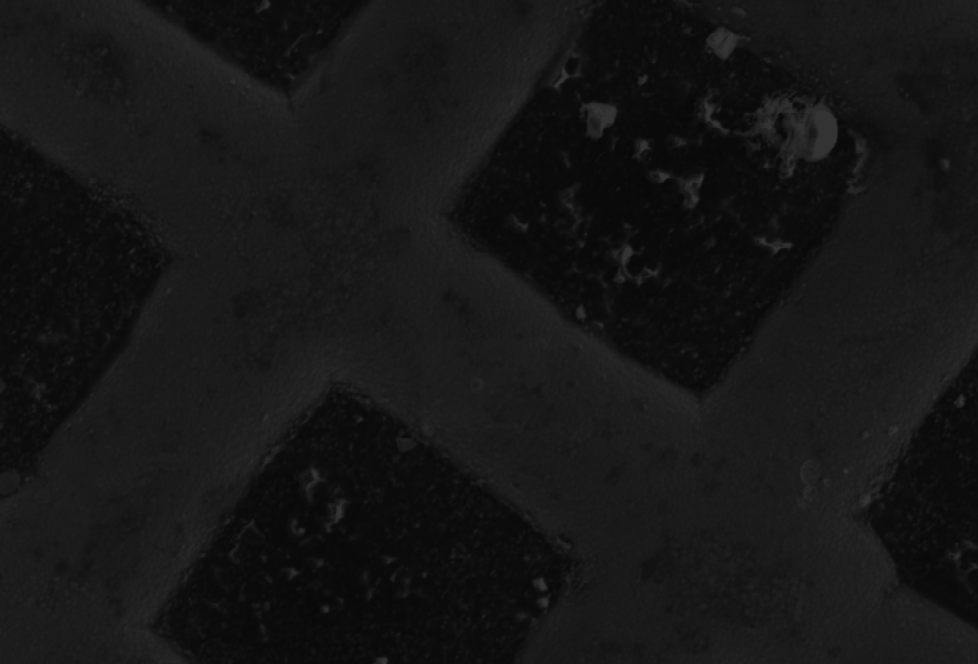

In [3]:
im = Image.open("images_png/2.png").convert("L")
im

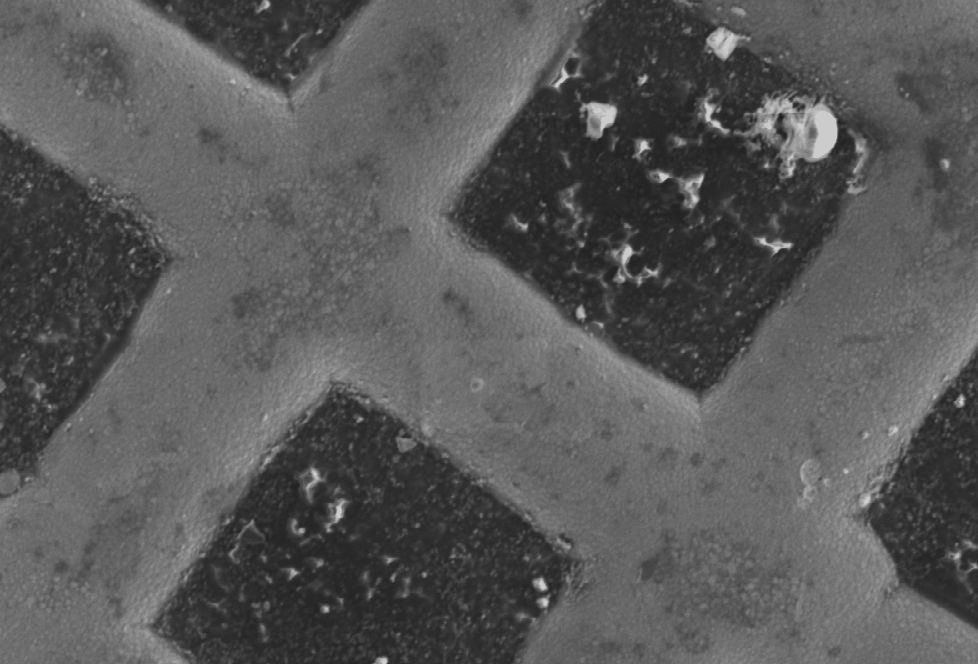

In [4]:
imBrightness = ImageEnhance.Brightness(im)
imBright = imBrightness.enhance(4)
imBright

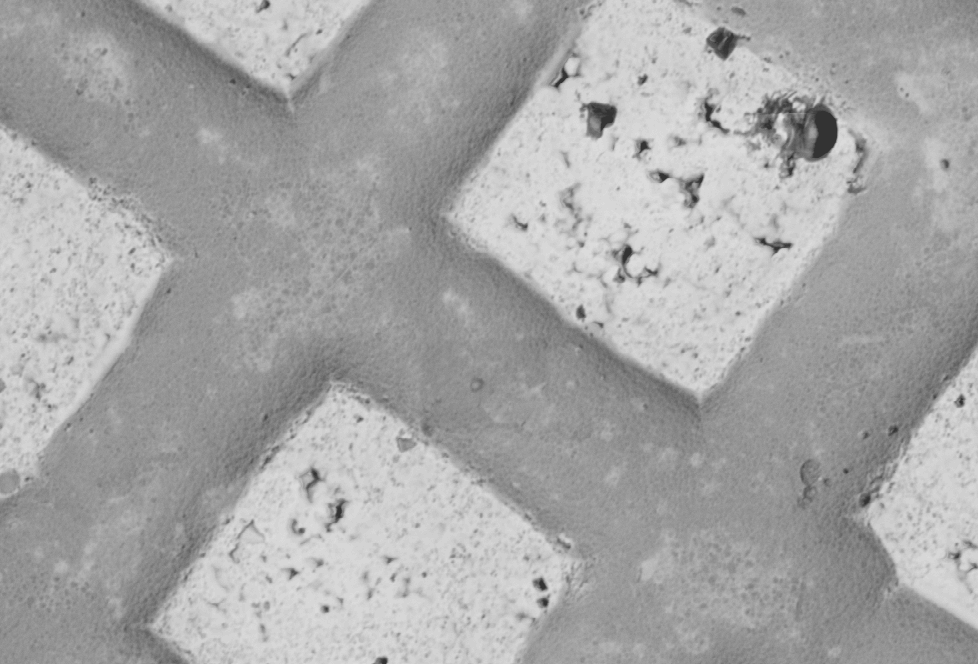

In [5]:
imArray = np.asarray(imBright.convert('L'))
imArray = cv2.bitwise_not(imArray)
Image.fromarray(imArray)

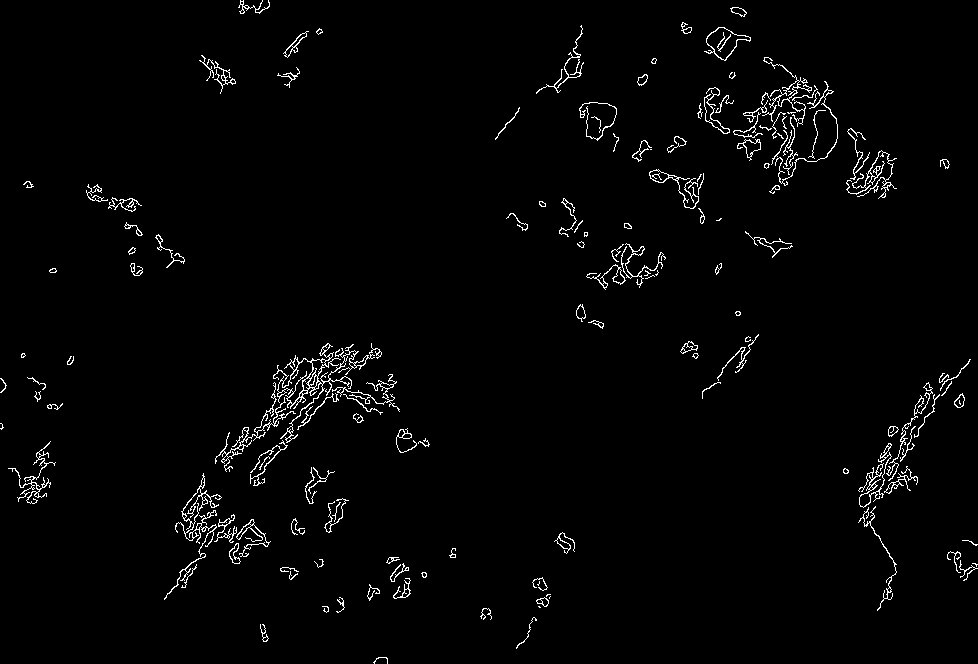

In [6]:
blur = cv2.GaussianBlur(imArray, (3,3), 5)
edges = cv2.Canny(blur,10, 200)
Image.fromarray(edges)


C:\Users\munky\AppData\Local\Temp/ipykernel_88824/1756400682.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(((20*np.log10( 0.1 + shift)).astype(int)), cmap="gray")


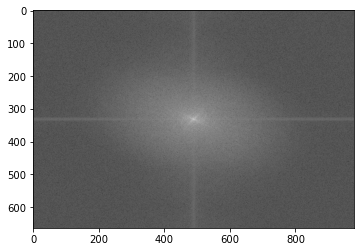

In [7]:
dft = np.fft.fft2(imArray.astype(float))
shift = np.fft.fftshift(dft)
plt.imshow(((20*np.log10( 0.1 + shift)).astype(int)), cmap="gray")

In [8]:
(w, h) = imArray.shape
half_w, half_h = int(w/2), int(h/2)

C:\Users\munky\AppData\Local\Temp/ipykernel_88824/3954340924.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow( (20*np.log10( 0.1 + shift)).astype(int), cmap="gray")


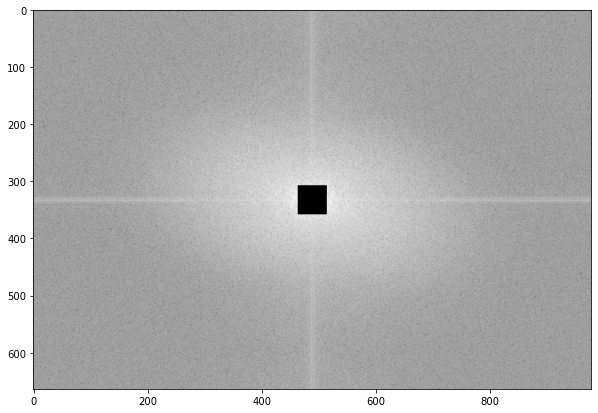

In [9]:
n = 25
shift[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the first 50x50 (low) frequencies
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + shift)).astype(int), cmap="gray")

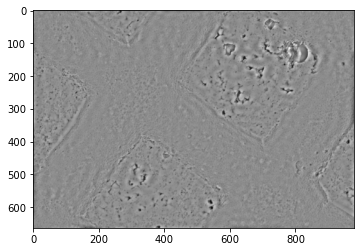

In [10]:
ifft = np.fft.ifft2(np.fft.ifftshift(shift)).real
plt.imshow(ifft, cmap="gray")

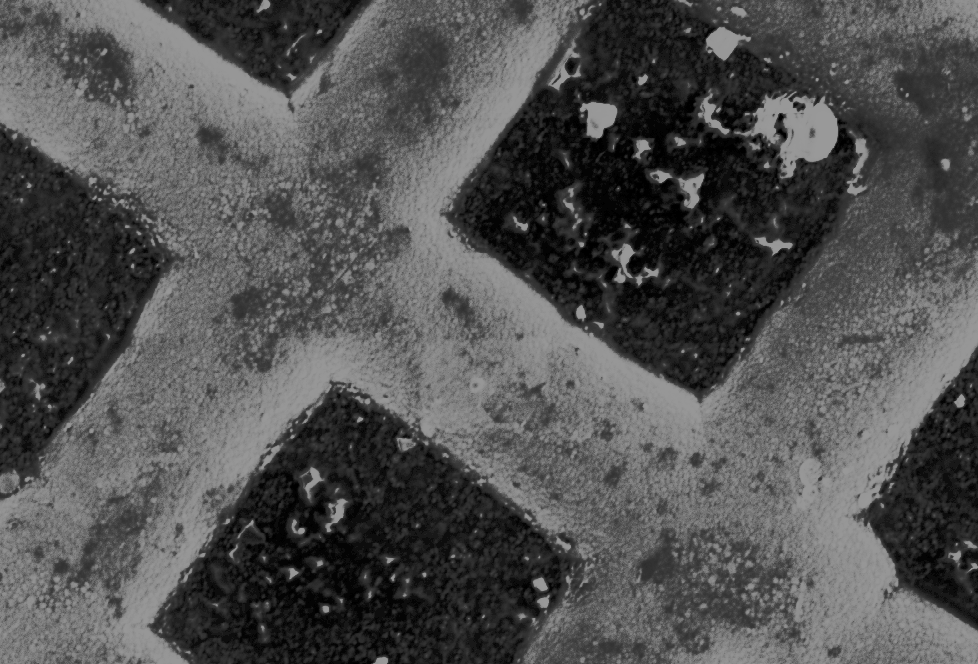

In [11]:
imArray = cv2.imread("images_png/2.png", cv2.IMREAD_GRAYSCALE)
equalised = cv2.equalizeHist(imArray)
brightness = ImageEnhance.Brightness(Image.fromarray(equalised))
brightness.enhance(0.6)

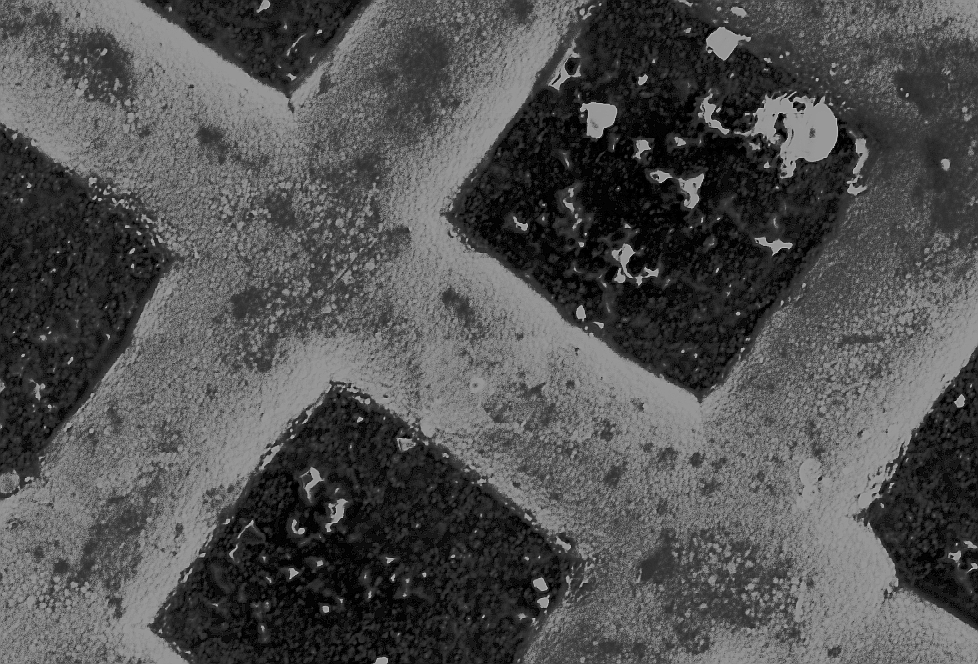

In [12]:
imArray = cv2.imread("images_png/2.png", cv2.IMREAD_GRAYSCALE)
equalised = cv2.equalizeHist(imArray)
brightness = ImageEnhance.Brightness(Image.fromarray(equalised))
brighter = brightness.enhance(0.6)

sharpener = brighter.filter(ImageFilter.SHARPEN)
sharpener

In [15]:
import pywt
from IPython.display import display

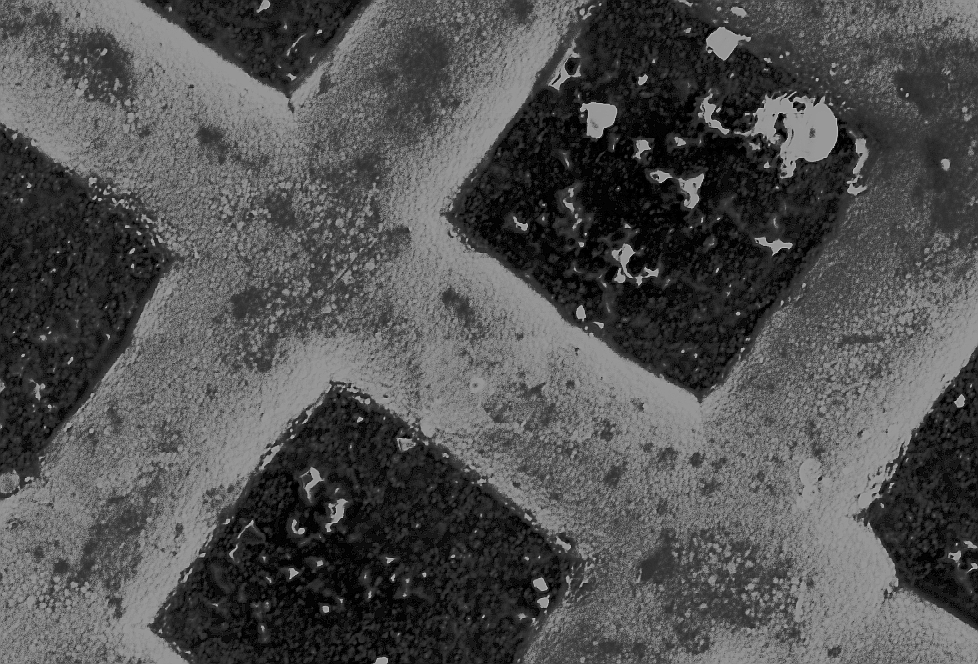

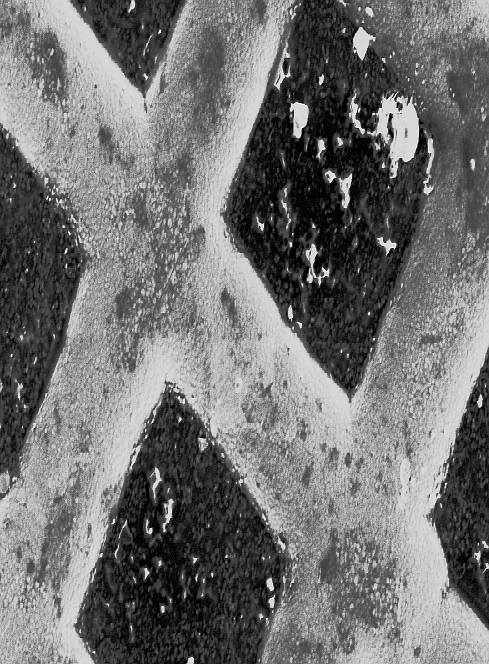

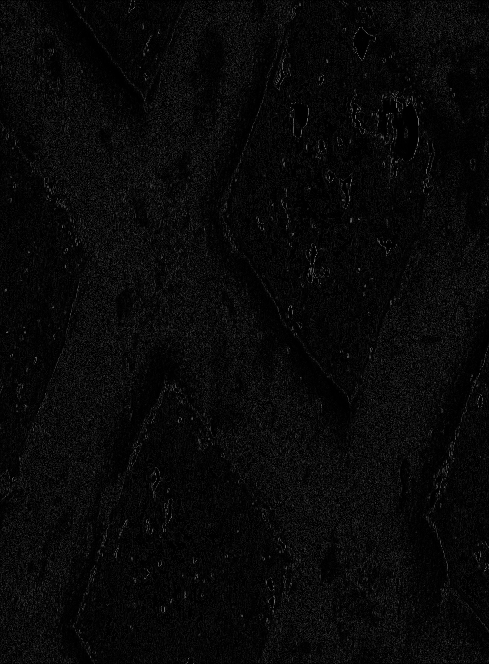

In [28]:
imArray = cv2.imread("images_png/2.png", cv2.IMREAD_GRAYSCALE)
equalised = cv2.equalizeHist(imArray)
brightness = ImageEnhance.Brightness(Image.fromarray(equalised))
brighter = brightness.enhance(0.6)

sharper = brighter.filter(ImageFilter.SHARPEN)
sharper = sharper.convert("L")

coeffs = pywt.dwt(sharper, "haar")
(cA, cD) = coeffs

display(sharper, Image.fromarray(cv2.convertScaleAbs(cA)), Image.fromarray(cv2.convertScaleAbs(cD)))

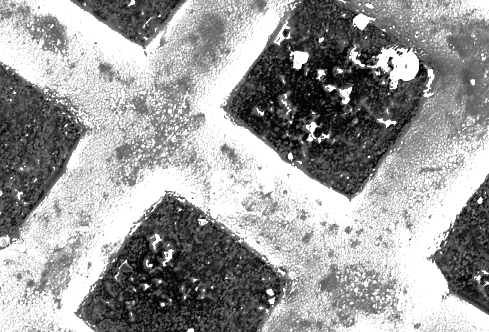

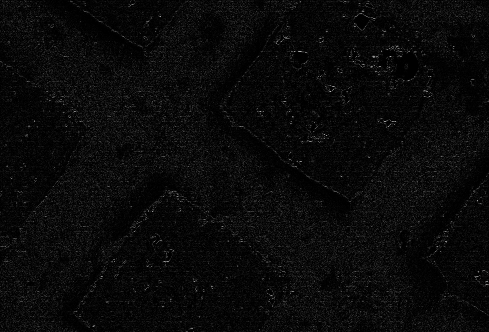

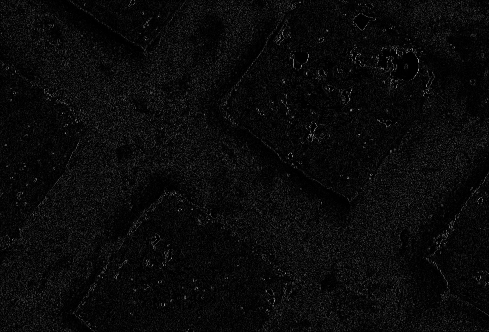

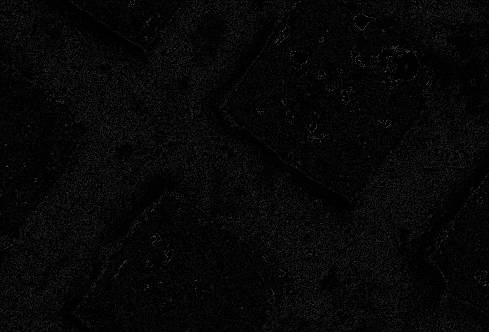

In [38]:
imArray = cv2.imread("images_png/2.png", cv2.IMREAD_GRAYSCALE)
equalised = cv2.equalizeHist(imArray)
brightness = ImageEnhance.Brightness(Image.fromarray(equalised))
brighter = brightness.enhance(0.6)

sharper = brighter.filter(ImageFilter.SHARPEN)
sharper = sharper.convert("L")

coeffs = pywt.dwt2(sharper, "haar")
cA, (cH, cV, cD)  = coeffs

display(*list(map(Image.fromarray, map(cv2.convertScaleAbs, [cA, cH, cV, cD]))))

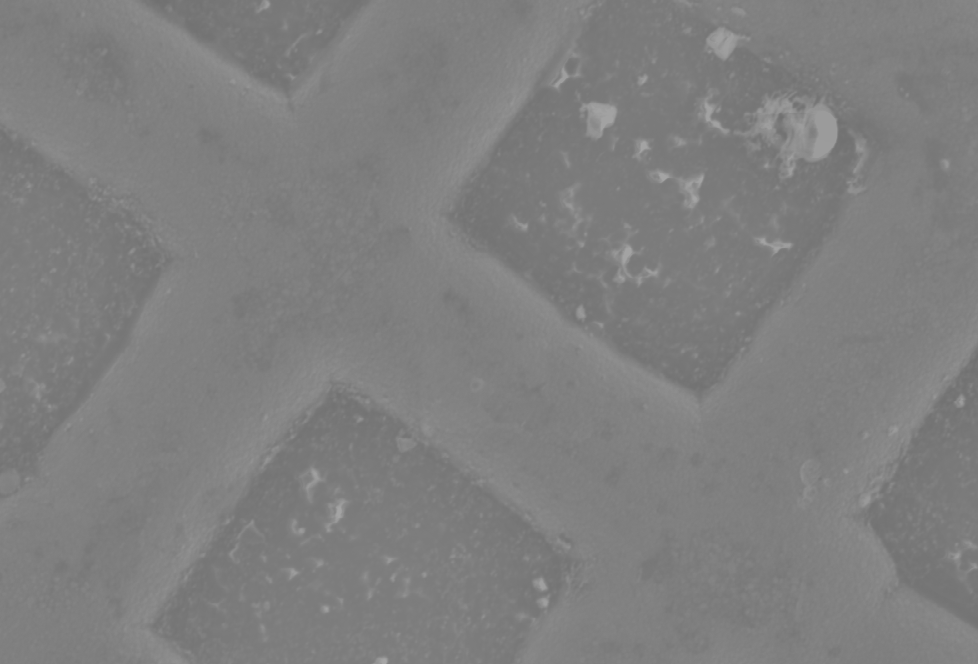

In [46]:
imArray = cv2.imread("images_png/2.png", cv2.IMREAD_GRAYSCALE)
equalised = cv2.equalizeHist(imArray)
brightness = ImageEnhance.Brightness(Image.fromarray(equalised))
brighter = brightness.enhance(0.6)

sharper = brighter.filter(ImageFilter.SHARPEN)
sharper = sharper.convert("L")

def highpass(img, sigma):
    return img - cv2.GaussianBlur(img, (0,0), sigma) + 127

Image.fromarray(highpass(np.asarray(sharper), 51))